<a href="https://colab.research.google.com/github/piyu18/K-Means/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import necessary libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Import Dataset


In [2]:
# Read the dataset
df = pd.read_csv('Mall_Customers.csv')
df.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
165,166,Female,36,85,75
48,49,Female,29,40,42
73,74,Female,60,50,56
184,185,Female,41,99,39
45,46,Female,24,39,65


### Exploratory Data Analysis

In [3]:
# Check the shape of the dataset
df.shape

(200, 5)

In [4]:
# View Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Checking for null values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
X = df.iloc[:,3:]
X[:5]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Find the optimal value of K using Elbow Method

In [7]:
inertia = []
for i in range(1, 10):
  kmean = KMeans(n_clusters=i , init='k-means++' , random_state=13)
  kmean.fit(X)
  inertia.append(kmean.inertia_)
inertia[:5]

[269981.28,
 183069.17582751298,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337]

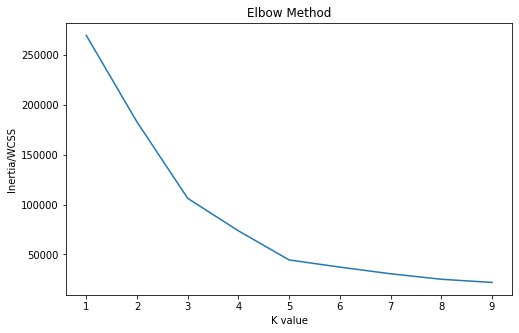

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia)
plt.xlabel('K value')
plt.ylabel('Inertia/WCSS')
plt.title('Elbow Method')
plt.show()

From the plot we can see that elbow point is at 5. So total no of clusters will be 5

### Train the Model

In [9]:
model = KMeans(n_clusters=5, init='k-means++',random_state=13)
model.fit_predict(X)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)